# EE 418 Project Report

Members: Simon Chen (1832768), 
Kejin Li (1978130), 
Andres Guerrero-Guzman (1066684), 
Khoa Tran (1861460)

In [1]:
from ids import *
import numpy as np
import matplotlib.pyplot as plt

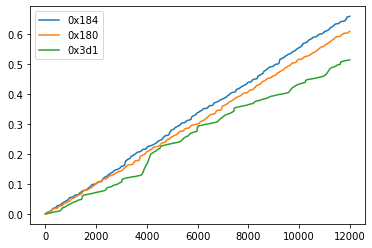

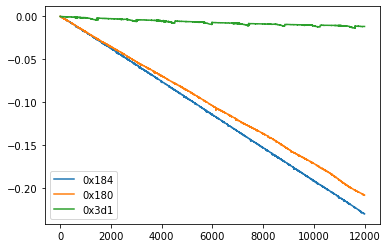

In [2]:
__author__ = "ee418"

def import_data(file=None):
    with open(file) as f:
        lines = f.readlines()
    data = [float(x.strip()) for x in lines]
    return data


# TODO: Plot accumulated offset curves for both state-of-the-art and NTP-based IDSs.
def plot_acc_offsets(ids, mode):
    if mode == 'state-of-the-art':
        # ====================== Start of Your Code =========================
        # Example: Plot accumulated offset curve for 0x184.
        # Your code goes here.
        plt.plot(ids['184-sota'].elapsed_time_sec_hist, ids['184-sota'].acc_offset_us_hist, label='0x184')
        plt.plot(ids['180-sota'].elapsed_time_sec_hist, ids['180-sota'].acc_offset_us_hist, label='0x180')
        plt.plot(ids['3d1-sota'].elapsed_time_sec_hist, ids['3d1-sota'].acc_offset_us_hist, label='0x3d1')
        plt.legend()
        plt.show()

        # ====================== End of Your Code =========================
    elif mode == 'ntp-based':
        # ====================== Start of Your Code =========================

        # Your code goes here
        plt.plot(ids['184-ntp'].elapsed_time_sec_hist, ids['184-ntp'].acc_offset_us_hist, label='0x184')
        plt.plot(ids['180-ntp'].elapsed_time_sec_hist, ids['180-ntp'].acc_offset_us_hist, label='0x180')
        plt.plot(ids['3d1-ntp'].elapsed_time_sec_hist, ids['3d1-ntp'].acc_offset_us_hist, label='0x3d1')
        plt.legend()
        plt.show()
        # ====================== End of Your Code =========================


# TODO: Implement this simulation (N=20)
def simulation_masquerade_attack(mode):

    if mode == 'state-of-the-art':
        
        data_184 = import_data('184.txt')
        data_3d1 = import_data('3d1.txt')

        N = 20

        # Construct a new data-set with the first 1000 batches of data_184,
        # followed by 1000 batches of data_3d1. That is, the masquerade
        # attack occurs at the 1001-st batch.
        data_184 = np.asarray(data_184[0:1000 * N]) - data_184[0]  # Relative timestamps
        data_3d1 = np.asarray(data_3d1[0:1000 * N]) - data_3d1[0]  # Relative timestamps
        data = np.append(data_184, data_184[-1] + 0.1 + data_3d1)  # The 1st spoofed message occurs exactly 0.1 sec
                                                                   # (the period) after the last legitimate message.

        ids = IDS(T_sec=0.1, N=N, mode='state-of-the-art')

        batch_num = 2000
        for i in range(batch_num):
            batch = np.asarray(data[i * N:(i + 1) * N])
            ids.update(batch)

        plt.plot(ids.L_upper_hist, label='Upper Control Limit')
        plt.plot(ids.L_lower_hist, label='Lower Control Limit')
        plt.xlabel('Number of Batches')
        plt.ylabel('Control Limits')
        plt.title('Control Limits for State-of-the-Art IDS')
        plt.legend()
        plt.show()
    elif mode == 'ntp-based':
        # ====================== Start of Your Code =========================
        
        # Your code goes here.
        data_184 = import_data('184.txt')
        data_3d1 = import_data('3d1.txt')

        N = 20

        # Construct a new data-set with the first 1000 batches of data_184,
        # followed by 1000 batches of data_3d1. That is, the masquerade
        # attack occurs at the 1001-st batch.
        data_184 = np.asarray(data_184[0:1000 * N]) - data_184[0]  # Relative timestamps
        data_3d1 = np.asarray(data_3d1[0:1000 * N]) - data_3d1[0]  # Relative timestamps
        data = np.append(data_184, data_184[-1] + 0.1 + data_3d1)  # The 1st spoofed message occurs exactly 0.1 sec
                                                                   # (the period) after the last legitimate message.

        ids = IDS(T_sec=0.1, N=N, mode='ntp-based')

        batch_num = 2000
        for i in range(batch_num):
            batch = np.asarray(data[i * N:(i + 1) * N])
            ids.update(batch)

        plt.plot(ids.L_upper_hist, label='Upper Control Limit')
        plt.plot(ids.L_lower_hist, label='Lower Control Limit')
        plt.xlabel('Number of Batches')
        plt.ylabel('Control Limits')
        plt.title('Control Limits for NTP-based IDS')
        plt.legend()
        plt.show()
        # ====================== End of Your Code  =========================


# TODO: Implement this simulation (N=20)
def simulation_cloaking_attack(mode):
    if mode == 'state-of-the-art':
        # ====================== Start of Your Code =========================
        
        # Your code goes here.
        data_184 = import_data('184.txt')
        data_180 = import_data('180.txt')

        N = 20

        # Construct a new data-set with the first 1000 batches of data_184,
        # followed by 1000 batches of data_3d1. That is, the masquerade
        # attack occurs at the 1001-st batch.
        data_184 = np.asarray(data_184[0:1000 * N]) - data_184[0]  # Relative timestamps
        data_180 = np.asarray(data_180[0:1000 * N]) - data_180[0]  # Relative timestamps
        data = np.append(data_184, data_184[-1] + 0.1 + data_180)  # The 1st spoofed message occurs exactly 0.1 sec
                                                                   # (the period) after the last legitimate message.

        ids = IDS(T_sec=0.1, N=N, mode='state-of-the-art')

        batch_num = 2000
        for i in range(batch_num):
            batch = np.asarray(data[i * N:(i + 1) * N])
            ids.update(batch)
        plt.plot(ids.L_upper_hist, label='Upper Control Limit')
        plt.plot(ids.L_lower_hist, label='Lower Control Limit')
        plt.xlabel('Number of Batches')
        plt.ylabel('Control Limits')
        plt.title('Control Limits for State-of-the-Art-based IDS')
        plt.legend()
        plt.show()
        # ====================== End of Your Code =========================

    elif mode == 'ntp-based':
        # ====================== Start of Your Code =========================
        
        # Your code goes here.
        data_184 = import_data('184.txt')
        data_180 = import_data('180.txt')

        N = 20

        # Construct a new data-set with the first 1000 batches of data_184,
        # followed by 1000 batches of data_3d1. That is, the masquerade
        # attack occurs at the 1001-st batch.
        data_184 = np.asarray(data_184[0:1000 * N]) - data_184[0]  # Relative timestamps
        data_180 = np.asarray(data_180[0:1000 * N]) - data_180[0]  # Relative timestamps
        data = np.append(data_184, data_184[-1] + 0.1 + data_180)  # The 1st spoofed message occurs exactly 0.1 sec
                                                                   # (the period) after the last legitimate message.
        #if unexpected behavior remove \deltaT term (cloacking clock paper pg.8 col.1)
        ids = IDS(T_sec=0.1, N=N, mode='ntp-based')

        batch_num = 2000
        for i in range(batch_num):
            batch = np.asarray(data[i * N:(i + 1) * N])
            ids.update(batch)

        plt.plot(ids.L_upper_hist, label='Upper Control Limit')
        plt.plot(ids.L_lower_hist, label='Lower Control Limit')
        plt.xlabel('Number of Batches')
        plt.ylabel('Control Limits')
        plt.title('Control Limits for NTP-based IDS')
        plt.legend()
        plt.show()
        # ====================== End of Your Code =========================


if __name__ == '__main__':
    # If IDS is correctly implemented, you should be able to run the following code.
    data_184 = import_data('184.txt')
    data_3d1 = import_data('3d1.txt')
    data_180 = import_data('180.txt')

    data_184 = np.asarray(data_184) - data_184[0]
    data_3d1 = np.asarray(data_3d1) - data_3d1[0]
    data_180 = np.asarray(data_180) - data_180[0]

    ids = dict()

    N = 20      # Change this to 30 for Task 4
    ids['184-sota'] = IDS(T_sec=0.1, N=N, mode='state-of-the-art')
    ids['184-ntp'] = IDS(T_sec=0.1, N=N, mode='ntp-based')

    ids['3d1-sota'] = IDS(T_sec=0.1, N=N, mode='state-of-the-art')
    ids['3d1-ntp'] = IDS(T_sec=0.1, N=N, mode='ntp-based')

    ids['180-sota'] = IDS(T_sec=0.1, N=N, mode='state-of-the-art')
    ids['180-ntp'] = IDS(T_sec=0.1, N=N, mode='ntp-based')

    if N == 20:
        batch_num = 6000
    elif N == 30:
        batch_num = 4000
    else:
        batch_num = 6000

    for i in range(batch_num):
        batch_184 = data_184[i*N:(i+1)*N]
        ids['184-sota'].update(batch_184)
        ids['184-ntp'].update(batch_184)

        batch_3d1 = data_3d1[i*N:(i+1)*N]
        ids['3d1-sota'].update(batch_3d1)
        ids['3d1-ntp'].update(batch_3d1)

        batch_180 = data_180[i * N:(i + 1) * N]
        ids['180-sota'].update(batch_180)
        ids['180-ntp'].update(batch_180)


    # Task 2: Plot accumulated offset curves for 0x184, 0x3d1, and 0x180, for the state-of-the-art IDS.
    plot_acc_offsets(ids, "state-of-the-art")

    # Task 3: Plot accumulated offset curves for 0x184, 0x3d1, and 0x180, for the NTP-based IDS.
    plot_acc_offsets(ids, "ntp-based")


The slopes of the curves from Task 2 and 3 are opposite as state-of-the-art has a positive slope, while NTP-based has a negative slope. The clock skew is the different in the frequencies of C_a and C_true. Between state-of-the-art and NTP-based, for the three different messages, the estimated clock skew for each message are similar from the perspective of the IDS, as the state-of-the-art IDS has a significantly larger σ than the NTP-based IDS, which demonstrates its inconsistency in clock skew estimation.

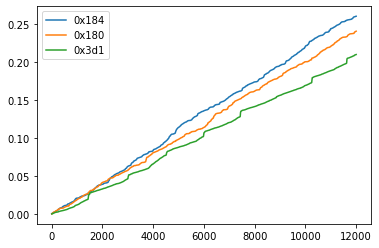

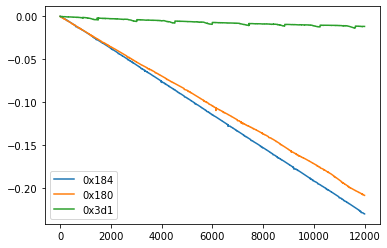

In [4]:
if __name__ == '__main__':
    # If IDS is correctly implemented, you should be able to run the following code.
    data_184 = import_data('184.txt')
    data_3d1 = import_data('3d1.txt')
    data_180 = import_data('180.txt')

    data_184 = np.asarray(data_184) - data_184[0]
    data_3d1 = np.asarray(data_3d1) - data_3d1[0]
    data_180 = np.asarray(data_180) - data_180[0]

    ids = dict()

    N = 30      # Change this to 30 for Task 4
    ids['184-sota'] = IDS(T_sec=0.1, N=N, mode='state-of-the-art')
    ids['184-ntp'] = IDS(T_sec=0.1, N=N, mode='ntp-based')

    ids['3d1-sota'] = IDS(T_sec=0.1, N=N, mode='state-of-the-art')
    ids['3d1-ntp'] = IDS(T_sec=0.1, N=N, mode='ntp-based')

    ids['180-sota'] = IDS(T_sec=0.1, N=N, mode='state-of-the-art')
    ids['180-ntp'] = IDS(T_sec=0.1, N=N, mode='ntp-based')

    if N == 20:
        batch_num = 6000
    elif N == 30:
        batch_num = 4000
    else:
        batch_num = 6000

    for i in range(batch_num):
        batch_184 = data_184[i*N:(i+1)*N]
        ids['184-sota'].update(batch_184)
        ids['184-ntp'].update(batch_184)

        batch_3d1 = data_3d1[i*N:(i+1)*N]
        ids['3d1-sota'].update(batch_3d1)
        ids['3d1-ntp'].update(batch_3d1)

        batch_180 = data_180[i * N:(i + 1) * N]
        ids['180-sota'].update(batch_180)
        ids['180-ntp'].update(batch_180)

# Task 4: Change N to 30, and repeat Tasks 2 and 3.
    plot_acc_offsets(ids, "state-of-the-art")
    plot_acc_offsets(ids, "ntp-based")



For both state-of-the-art IDS and NTP-based IDS, the slop of the curve for the same message is similar, regardless of batch sizes (N). However, between the state-of-the-art IDS and NTP-based IDS, significant differences in the estimated clock skew are observed for the same message using the state-of-the-art IDS, whereas the estimated clock skew by the NTP-based IDS is almost identical with different batch sizes. This demonstrates the consistency in clock skew estimation for NTP-based IDS compared to state-of-the-art IDS.

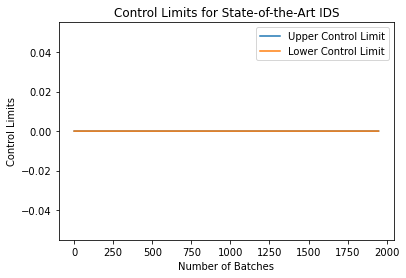

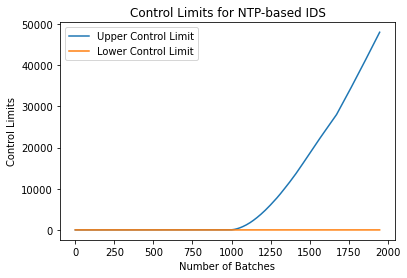

In [5]:
if __name__ == '__main__':
# Task 5: Simulate the masquerade attack, and plot upper/lower control limits.
    simulation_masquerade_attack("state-of-the-art")
    simulation_masquerade_attack("ntp-based")


NTP-based is more effective at detecting masquerade attacks compared to the state-of-the-art IDS. The NTP-based IDS has a smaller Maximum Slackness Index (MSI),which is the range of added delay that the adversary actions can introduce before being detected, resulting in higher effectiveness at detecting masquerate attacks. As seen in the chart, the upper control limit of the NTP-based IDS grows as the batches grow, while the upper and lower control limit of the state-of-the-art IDS are indistinguishable. 

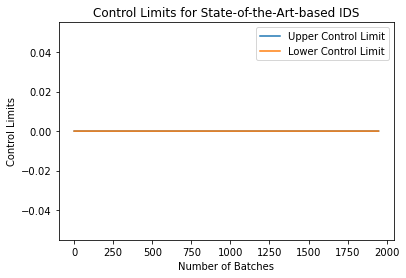

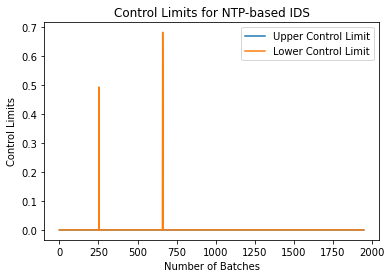

In [6]:
if __name__ == '__main__':
# Task 6: Simulate the cloaking attack, and plot upper/lower control limits.
    simulation_cloaking_attack("state-of-the-art")
    simulation_cloaking_attack("ntp-based")

Cloaking attacks can bypass both the state-of-the-art IDS and the NTP-based IDS. With the cloaking attack, the clock skews before and after the attack are indistinguishable. As seen in the plots above, the deviations are small, as the control limits are always zero, resulting in both IDS unable to dettec cloaking attacks. 

As seen in the plots above, with the masquerade attacks, the deviations add up and causes the control limits of the IDS to increase. However, with the cloaking attack, it is the opposite. The limitations of a clock-skew IDS is clear as masquerade attacks are detectable, while cloaking attacks are not.